### **Required Libraries**

In [21]:
import os
import zipfile
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, signal
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
%matplotlib inline

### **Extract dataset**

In [23]:
Path = '/content/cats&dogs.zip'
zip_ref = zipfile.ZipFile(Path, 'r')
zip_ref.extractall('/content')
zip_ref.close()

### **Directories**

In [10]:
base = '/content/cats&dogs'
train_f, validation_f = os.path.join(base, 'train'), os.path.join(base, 'validation')

### **Download Weights**

In [17]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-08-20 05:18:03--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  70.8MB/s    in 1.2s    

2021-08-20 05:18:04 (70.8 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [22]:
local_weights_file = '/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [24]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [25]:
Before = pre_trained_model.get_layer('mixed7')
print('Before Layer shape:', Before.output_shape)
Before = Before.output

Before Layer shape: (None, 7, 7, 768)


### **Setup Model**

In [27]:
Layer = layers.Flatten()(Before)
Layer = layers.Dense(1024, activation='relu')(Layer)
Layer = layers.Dropout(0.2)(Layer)
Layer = layers.Dense(1, activation='sigmoid')(Layer)
model = Model(pre_trained_model.input, Layer)
#Conifuration
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### **Data Processing**

In [28]:
training, Validating = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True), ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [29]:
Generate_training = training.flow_from_directory(train_f, target_size=(150, 150), batch_size=20, class_mode='binary')
Generate_Validation = training.flow_from_directory(validation_f , target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
history = model.fit_generator(Generate_training, steps_per_epoch=100, epochs=10, validation_data=Generate_Validation, validation_steps=50, verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 - 55s - loss: 0.3739 - acc: 0.8540 - val_loss: 0.2401 - val_acc: 0.9040
Epoch 2/10
100/100 - 22s - loss: 0.2253 - acc: 0.9055 - val_loss: 0.1957 - val_acc: 0.9250
Epoch 3/10
100/100 - 22s - loss: 0.2179 - acc: 0.9215 - val_loss: 0.2130 - val_acc: 0.9160
Epoch 4/10
100/100 - 22s - loss: 0.1847 - acc: 0.9380 - val_loss: 0.3755 - val_acc: 0.8770
Epoch 5/10
100/100 - 22s - loss: 0.2066 - acc: 0.9245 - val_loss: 0.1979 - val_acc: 0.9360
Epoch 6/10
100/100 - 21s - loss: 0.1769 - acc: 0.9320 - val_loss: 0.2038 - val_acc: 0.9290
Epoch 7/10
100/100 - 21s - loss: 0.1752 - acc: 0.9350 - val_loss: 0.2979 - val_acc: 0.9090
Epoch 8/10
100/100 - 21s - loss: 0.1493 - acc: 0.9475 - val_loss: 0.2410 - val_acc: 0.9230
Epoch 9/10
100/100 - 22s - loss: 0.1496 - acc: 0.9510 - val_loss: 0.2524 - val_acc: 0.9320
Epoch 10/10
100/100 - 21s - loss: 0.1525 - acc: 0.9435 - val_loss: 0.2475 - val_acc: 0.9230


### **Ploting Training and Validation**

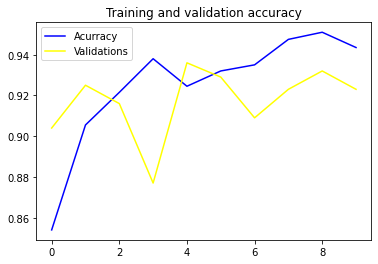

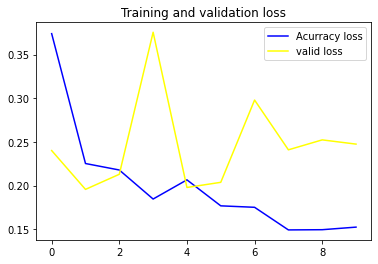

In [37]:
accuracy, Validation_acc, loss, Valid_loss = history.history['acc'], history.history['val_acc'], history.history['loss'], history.history['val_loss']
epochs = range(len(accuracy))
#Acurracy plot part
plt.plot(epochs, accuracy, color = 'blue', label='Acurracy')
plt.plot(epochs, Validation_acc, color='yellow', label='Validations' )
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
# Loss plot part
plt.plot(epochs, loss,color = 'blue', label='Acurracy loss')
plt.plot(epochs, Valid_loss, color = 'yellow', label='valid loss')
plt.title('Training and validation loss')
plt.legend()


### **Testing on Images for Predictions**

In [50]:
Rows, Colums, itr = 4, 4, 0

In [51]:
trained_cats_dir = os.path.join(train_f, 'cats')
trained_dogs_dir = os.path.join(train_f, 'dogs')

In [52]:
trained_cat_fnames = os.listdir(trained_cats_dir)
trained_dog_fnames = os.listdir(trained_dogs_dir)

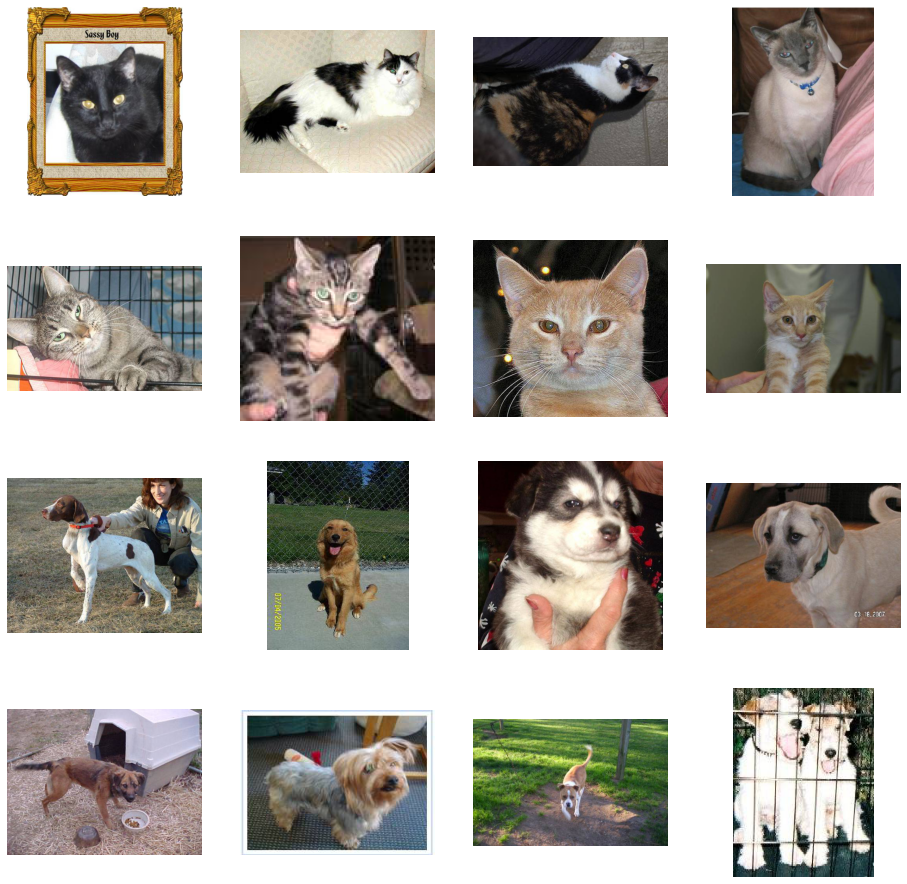

In [59]:
fig = plt.gcf()
fig.set_size_inches(Colums * 4, Rows * 4)

itr += 8
Cats = [os.path.join(trained_cats_dir, fname) 
                for fname in trained_cat_fnames[itr-8:itr]]
Dogs = [os.path.join(trained_dogs_dir, fname) 
                for fname in trained_dog_fnames[itr-8:itr]]

for i, img_path in enumerate(Cats+Dogs):
  sp = plt.subplot(Rows, Colums, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()